# Mugloest - 6 ADCP Experiment (March, 2013) 
# Faz Figura 6 - Richardson Number

<div>
    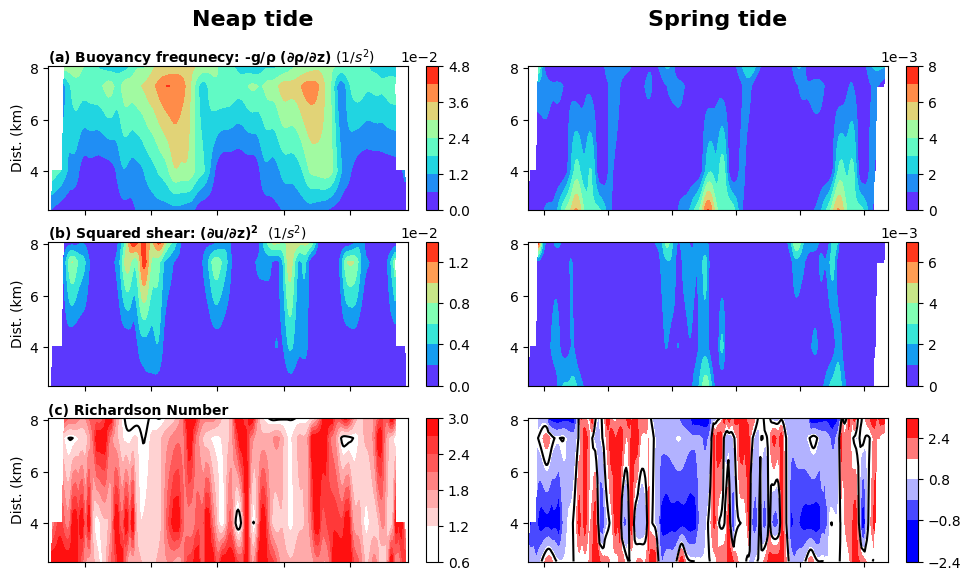
</div>


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from pprint import pprint
import seawater as sea
import scipy.signal as signal

# Filter design
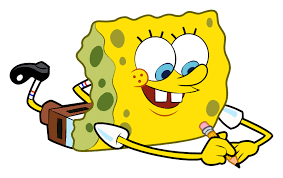

In [3]:
# removing high frequency oscillations

dt = 600    # 10 minutes in seconds
fs = 1/dt   # frequency of sampling
fc = 1/7200 # cut frequency 1 hour
fn = fs/2   # Nyquist frequency
fc_norm = fc / fn

b, a = signal.butter(N=4, Wn = fc_norm, btype = 'lowpass')

In [4]:
with open('Muglo_6ADCP_CT_dic.pkl', 'rb') as io:
    dic = pickle.load(io)

In [5]:
for c in dic:
    print(c)
print('')
for c in dic['neap']:
    print(c)
print('')
for c in dic['neap']['PF']:
    print(c)
print('')
for c in dic['neap']['PF']['surface']:
    print(c)

neap
spring

Praticagem
PF
Hospital
Rampa
Bombeiros
JoanaBezerra

time
pressure
temperature
time2d
z2d
currents2d
surface
bottom

temperature
salinity
density


## To extract the data from the dictionary to work with lists

In [6]:
# get the content of the dictionarly and create a list
def get_vars(campaign, station):
    time2d = dic[campaign][station]['time2d']
    z2d =    dic[campaign][station]['z2d']
    curr =   dic[campaign][station]['currents2d']  *-1 # Arnoldo's convention
    press =  dic[campaign][station]['pressure']
    time =   dic[campaign][station]['time']
    temp_s = dic[campaign][station]['surface']['temperature']
    sal_s =  dic[campaign][station]['surface']['salinity']
    temp_f = dic[campaign][station]['bottom']['temperature']
    sal_f =  dic[campaign][station]['bottom']['salinity']
    rho_s =  dic[campaign][station]['surface']['density']
    rho_f =  dic[campaign][station]['bottom']['density']

    bunch = [time2d, z2d, curr, time, press, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]
    return bunch

s1 = get_vars('spring', 'Praticagem')
n1 = get_vars('neap', 'Praticagem')

s2 = get_vars('spring', 'PF')
n2 = get_vars('neap', 'PF')

s3 = get_vars('spring', 'Bombeiros')
n3 = get_vars('neap', 'Bombeiros')

s4 = get_vars('spring', 'Hospital')
n4 = get_vars('neap', 'Hospital')

s5 = get_vars('spring', 'Rampa')
n5 = get_vars('neap', 'Rampa')

s6 = get_vars('spring', 'JoanaBezerra')
n6 = get_vars('neap', 'JoanaBezerra')

# coloca a ordem utilizada no artigo do Arnoldo 
# Praticagem, PF, Hospital, Rampa

N = [n1, n2, n4, n5]
S = [s1, s2, s4, s5]

CPS = [N, S] # campanhas

In [7]:
N[0][3][1] - N[0][3][0]

datetime.timedelta(seconds=600)

In [8]:
# distances km of the stations from the mouth
distances = np.array([2.5, 4, 7.3, 8.1])
distances_i = np.linspace(2.5, 8.1, 10)

## To find the interpolation time 

In [9]:
# bunch = [time2d, z2d, curr, time, press, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]

# convert the datetime to num
N_tn = []
S_tn = []
for i in range(4):
    N_tn.append(mdates.date2num(N[i][3]))
    S_tn.append(mdates.date2num(S[i][3]))

# find the min and max 
N_tn_min = min(min(x) for x in N_tn)
N_tn_max = max(max(x) for x in N_tn)

S_tn_min = min(min(x) for x in S_tn)
S_tn_max = max(max(x) for x in S_tn)

# create the interpolation time
dt = 1/(24*10)
N_ti = np.arange(N_tn_min, N_tn_max + dt, dt)
S_ti = np.arange(S_tn_min, S_tn_max + dt, dt)

# interpolation time to be use for plotting
N_ti_dt = mdates.num2date(N_ti)
S_ti_dt = mdates.num2date(S_ti)

### changing from Figure 4 notebook
### we need the pressure (depth) to calculate vertical derivatives, replacing the waterlevel for the pressure

In [10]:
#  bunch = [time2d, z2d, curr, time, press, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]

# to separate the data to produce Figure 3
def new_bunch(bunch):

    # waterlevel = bunch[4] - np.mean(bunch[4])
    water_depth = bunch[4]

    curr_s = bunch[2][:,-1]
    curr_f = bunch[2][:,1]

            # time, water_depth, curr_s, curr_f, dens_s, dens_f
    return [bunch[3], water_depth, curr_s, curr_f, bunch[9]-1000, bunch[10]-1000]


In [11]:
# cpgn = N
# time_i = N_ti
def gera_matrizes_tempo_long(cpgn, time_i):
    g_v_i = [[],[],[],[],[]]
    for i in range(4):
        new_list = new_bunch(cpgn[i])
        time_n = mdates.date2num(new_list[0])
    
        
        for j, variable in enumerate(new_list[1:]):
            v_i = np.interp(time_i, time_n, variable, left=np.nan, right=np.nan)
            g_v_i[j].append(v_i)
    
    for i in range(len(g_v_i)):
        g_v_i[i] = np.array(g_v_i[i])
    
    tt, xx = np.meshgrid(time_i, distances)

    return tt, xx, g_v_i

In [12]:
# building the function above
# cpgn = N
# time_i = N_ti


# g_v_i = [[],[],[],[],[]]  # guard variables !!
# for i in range(4):
#     new_list = new_bunch(cpgn[i])
#     time_n = mdates.date2num(new_list[0])
    
#     for j, variable in enumerate(new_list[1:]):
#         v_i = np.interp(time_i, time_n, variable)
#         g_v_i[j].append(v_i)

# for i in range(len(g_v_i)):
#     g_v_i[i] = np.array(g_v_i[i])

# tt, xx = np.meshgrid(time_i, distances)

# g_v_i[0].shape

In [13]:
# Matrizes te tempo, distância longitudinal, e lista de matrizes das variáveis para cálculos [depth, vel sup, vel fun, rho sup, rho fun] rho em sigma t

N_tt, N_xx, N_vi = gera_matrizes_tempo_long(N, N_ti)
S_tt, S_xx, S_vi = gera_matrizes_tempo_long(S, S_ti)

N_tt_dt = np.array(mdates.num2date(N_tt))
S_tt_dt = np.array(mdates.num2date(S_tt))

N_tt_dt.shape

(4, 327)

# Calculations... 3

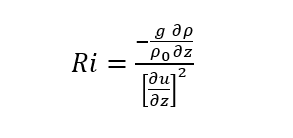

In [14]:
def filt_mtx(s):
    li, co = s.shape
    sf = np.full((li, co), np.nan)
    for l in range(li):
        i_good = np.where(~np.isnan(s[l,:]))[0]
        sf[l,i_good] = signal.filtfilt(b, a, s[l,i_good])
    return sf

-- To find out the drho/dz we need the depth! (pressure)   
I just changed the water level for the water depth, not minus de mean...

In [15]:
# prototyping

time = N_tt*24*3600  # time in seconds 
x = N_xx*1000        # distance in meters
z = N_vi[0]
u_s = N_vi[1]
u_b = N_vi[2]
rho_s = N_vi[3]
rho_b = N_vi[4]

# filtering
u_s = filt_mtx(u_s)
u_b = filt_mtx(u_b)
rho_s = filt_mtx(rho_s)
rho_b = filt_mtx(rho_b)

g = 9.8
rho_0 = 1025

drho_dz = (rho_s - rho_b)/z
du_dz = (u_s - u_b)/z

N2 = -g/rho_0*drho_dz
S2 = du_dz**2

Ri = N2/S2


In [16]:
def calculations_3(t, x, v, filt=False):
    time = t*24*3600  # time in seconds 
    x = x*1000        # distance in meters
    z = v[0]          # depth
    u_s = v[1]
    u_b = v[2]
    rho_s = v[3]
    rho_b = v[4] 

    if filt == True:
        u_s = filt_mtx(u_s)
        u_b = filt_mtx(u_b)
        rho_s = filt_mtx(rho_s)
        rho_b = filt_mtx(rho_b)

    g = 9.8
    rho_0 = 1025
    
    drho_dz = (rho_s - rho_b)/z
    du_dz = (u_s - u_b)/z
    
    N2 = -g/rho_0*drho_dz
    S2 = du_dz**2

    N2[N2 < 0] = 0.00001
    
    Ri = N2/S2
    
    return N2, S2, Ri

In [17]:
N_N2, N_S2, N_Ri = calculations_3(N_tt, N_xx, N_vi, filt=True)
S_N2, S_S2, S_Ri = calculations_3(S_tt, S_xx, S_vi, filt=True)

N_Ri = np.log10(N_Ri*4)
S_Ri = np.log10(S_Ri*4)

N_Ri[N_Ri > 3] = 3
S_Ri[S_Ri > 3] = 3

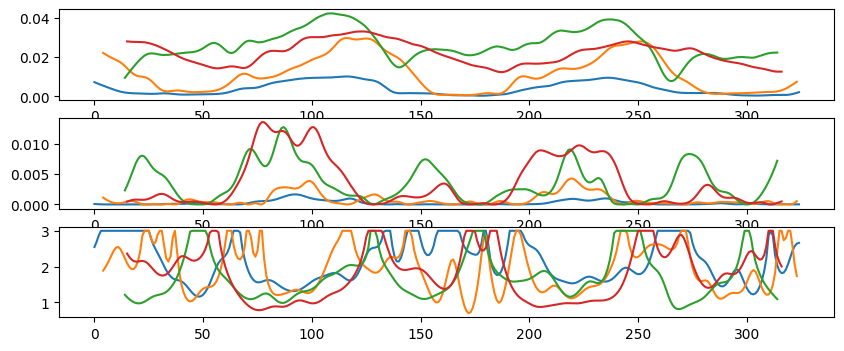

In [18]:
fig, axs = plt.subplots(3,figsize=(10,4))
axs[0].plot(N_N2.T)
axs[1].plot(N_S2.T)
axs[2].plot(N_Ri.T)

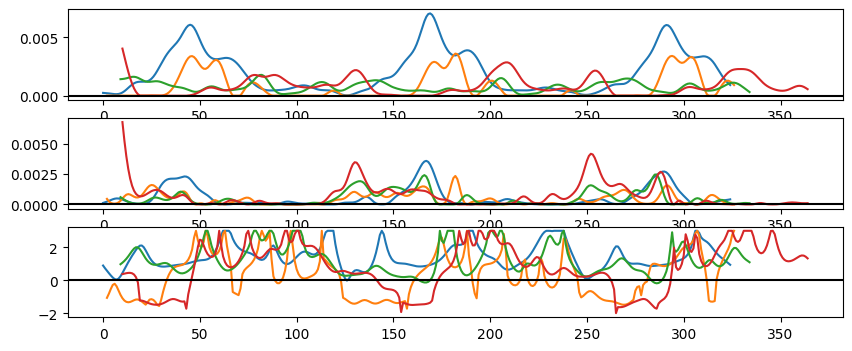

In [19]:
fig, axs = plt.subplots(3,figsize=(10,4))
axs[0].plot(S_N2.T)
axs[1].plot(S_S2.T)
axs[2].plot(S_Ri.T)
for ax in axs:
    ax.axhline(0, color='k')

# Plotting

In [20]:
N_calc_3 = [N_N2, N_S2, N_Ri]
S_calc_3 = [S_N2, S_S2, S_Ri]

In [21]:
# chatgpt - criando uma zona branca no zero do bwr

c_levels = 64

cmap = plt.get_cmap('bwr', c_levels)
colors = cmap(np.linspace(0, 1, c_levels))

f = 0.08
mid = int(c_levels*f)

center = c_levels // 2
colors[center-mid:center+mid] = [1,1,1,1]

new_cmap = mcolors.ListedColormap(colors, name='bwr2')

In [22]:
# from matplotlib.ticker import ScalarFormatter
# from matplotlib import ticker

In [23]:
np.log10(1)

0.0

In [24]:
N_Ri

array([[2.54632267, 2.69441605, 2.87072378, ..., 2.66300463,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

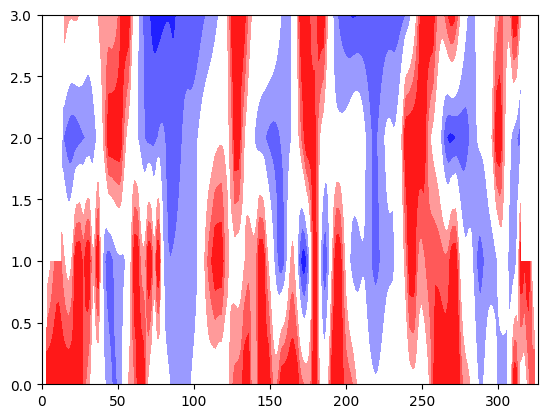

In [25]:
norm = mcolors.TwoSlopeNorm(vmin = np.nanmin(N_Ri), vcenter=1, vmax =np.nanmax(N_Ri))
plt.contourf(N_Ri, cmap=new_cmap)
plt.contour(N_Ri, [0], colors='k')

In [26]:
print(np.nanmin(S_Ri))
print(np.nanmax(S_Ri))

-1.986346140137369
3.0


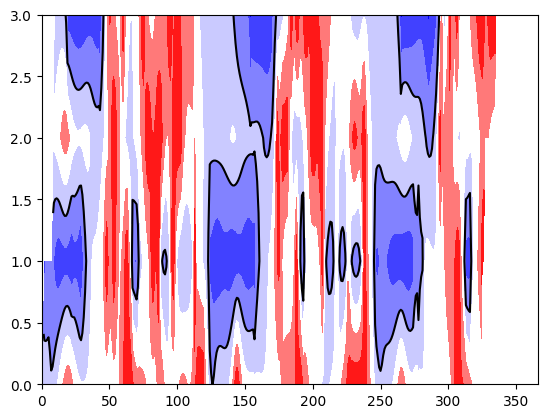

In [27]:
norm = mcolors.TwoSlopeNorm(vmin = np.nanmin(S_Ri), vcenter=1, vmax =np.nanmax(S_Ri))
plt.contourf(S_Ri, cmap=new_cmap, norm=norm)
plt.contour(S_Ri, [0], colors='k')

In [28]:
180*5.30*6

5724.0

In [29]:
2530+440+2400+5720

11090

In [34]:
.2*24

4.800000000000001

C:\Users\gutos\AppData\Local\Temp\ipykernel_14752\3103431063.py:42: RuntimeWarning: invalid value encountered in log10
  S_Ri = np.log10(S_calc_3[i]*4)


Text(0.6, 1.03, 'Spring tide')

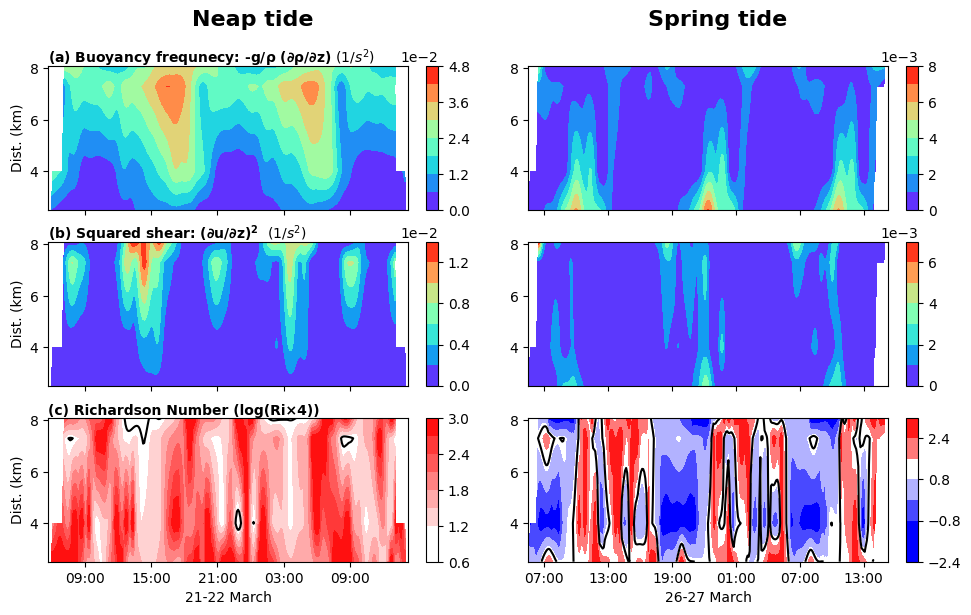

In [32]:
letters = ['(a) Buoyancy frequnecy: -g/ρ (∂ρ/∂z) $(1/s^2)$', '(b) Squared shear: $\mathbf{(\partial u / \partial z)^2\ }$ $(1/s^2)$',
           '(c) Richardson Number (log(Ri×4))']
fig = plt.figure(figsize=(12, 8))

px = .1
py = .8
dx = .3
dy = .18
pxcb1 = px+dx+.015

int_v = .04
int_h = .1

px2 = px+dx+int_h
pxcb2 = px2+dx+.015

ax_c1 = []
ax_c2 = []
ax_c1_cb = []
ax_c2_cb = []
for i in range(3):
    ax_c1.append(fig.add_axes([px, py-(dy+int_v)*i, dx, dy]))
    ax_c2.append(fig.add_axes([px2, py-(dy+int_v)*i, dx, dy]))

    ax_c1_cb.append(fig.add_axes([pxcb1, py-(dy+int_v)*i, .01, dy]))
    ax_c2_cb.append(fig.add_axes([pxcb2, py-(dy+int_v)*i, .01, dy]))

    if i < 2:
        cb1 = ax_c1[i].contourf(N_tt_dt, N_xx, N_calc_3[i], cmap='rainbow')
        cbar1 = plt.colorbar(cb1, cax=ax_c1_cb[i])
       
        cb2 = ax_c2[i].contourf(S_tt_dt, S_xx, S_calc_3[i], cmap='rainbow')
        cbar2 = plt.colorbar(cb2, cax=ax_c2_cb[i])

    else:
        N_Ri = np.log10(N_calc_3[i]*4)
        norm = mcolors.TwoSlopeNorm(vmin = -1, vcenter=1, vmax = 3)
        cb1 = ax_c1[i].contourf(N_tt_dt, N_xx, N_calc_3[i], cmap=new_cmap, norm=norm)
        cbar1 = plt.colorbar(cb1, cax=ax_c1_cb[i])
        ax_c1[i].contour(N_tt_dt, N_xx, N_calc_3[i], [1], colors='k')

        S_Ri = np.log10(S_calc_3[i]*4)
        norm = mcolors.TwoSlopeNorm(vmin = -1, vcenter=1, vmax = 3)
        cb2 = ax_c2[i].contourf(S_tt_dt, S_xx, S_calc_3[i], cmap=new_cmap, norm=norm)
        cbar2 = plt.colorbar(cb2, cax=ax_c2_cb[i])
        ax_c2[i].contour(S_tt_dt, S_xx, S_calc_3[i], [1], colors='k')

        

    cbs = [cbar1, cbar2]
    for cb in cbs:
        ticks = cb.get_ticks()
        select = ticks[::2]
        cb.set_ticks(select)
        cb.formatter.set_scientific(True)
        cb.formatter.set_powerlimits((0,0))
        
    axs = [ax_c1[i], ax_c2[i]]
    axs[0].set_ylabel('Dist. (km)')
    axs[1].set_xlim(S_tt_dt[0,0], S_tt_dt[0,-29])
    for j, ax in enumerate(axs):
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        if i < 2:
            ax.set_xticklabels('')
        else:
            if j == 0:    
                ax.set_xlabel('21-22 March')
            else:
                ax.set_xlabel('26-27 March')

    ax_c1[i].text(0, 1.02, letters[i], transform = ax_c1[i].transAxes, fontweight='bold')

fig.text(.22, 1.03, 'Neap tide', fontsize=16, fontweight='bold')
fig.text(.6, 1.03, 'Spring tide', fontsize=16, fontweight='bold')

ValueError: vmin, vcenter, and vmax must be in ascending order

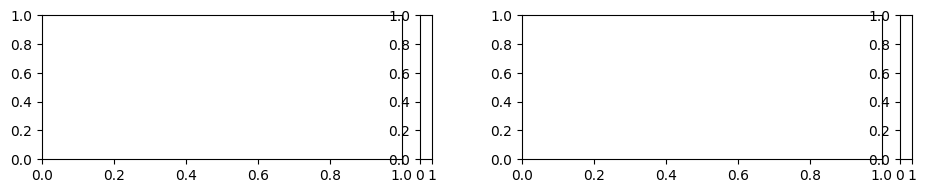

In [31]:
fig = plt.figure(figsize=(12, 8))

px = .1
py = .8
dx = .3
dy = .18
pxcb1 = px+dx+.015

int_v = .04
int_h = .1

px2 = px+dx+int_h
pxcb2 = px2+dx+.015

ax_c1 = []
ax_c2 = []
ax_c1_cb = []
ax_c2_cb = []
for i in range(3):
    ax_c1.append(fig.add_axes([px, py-(dy+int_v)*i, dx, dy]))
    ax_c2.append(fig.add_axes([px2, py-(dy+int_v)*i, dx, dy]))

    ax_c1_cb.append(fig.add_axes([pxcb1, py-(dy+int_v)*i, .01, dy]))
    ax_c2_cb.append(fig.add_axes([pxcb2, py-(dy+int_v)*i, .01, dy]))

    norm = mcolors.TwoSlopeNorm(vmin = np.nanmin(N_calc_3[i]), vcenter=0, vmax =np.nanmax(N_calc_3[i]))
    cb1 = ax_c1[i].contourf(N_tt_dt, N_xx, N_calc_3[i], cmap=new_cmap, norm=norm)
    cbar1 = plt.colorbar(cb1, cax=ax_c1_cb[i])
   
    ax_c1[i].contour(N_tt_dt, N_xx, N_calc_3[i], [0], colors='k')

    norm = mcolors.TwoSlopeNorm(vmin = np.nanmin(S_calc_3[i]), vcenter=0, vmax =np.nanmax(S_calc_3[i]))
    cb2 = ax_c2[i].contourf(S_tt_dt, S_xx, S_calc_3[i], cmap=new_cmap, norm=norm)
    cbar2 = plt.colorbar(cb2, cax=ax_c2_cb[i])
    ax_c2[i].contour(S_tt_dt, S_xx, S_calc_3[i], [0], colors='k')

    cbs = [cbar1, cbar2]
    for cb in cbs:
        ticks = cb.get_ticks()
        select = ticks[::2]
        cb.set_ticks(select)
        cb.formatter.set_scientific(True)
        cb.formatter.set_powerlimits((0,0))
        
    axs = [ax_c1[i], ax_c2[i]]
    axs[0].set_ylabel('Dist. (km)')
    axs[1].set_xlim(S_tt_dt[0,0], S_tt_dt[0,-29])
    for j, ax in enumerate(axs):
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        if i < 3:
            ax.set_xticklabels('')
        else:
            if j == 0:    
                ax.set_xlabel('21-22 March')
            else:
                ax.set_xlabel('26-27 March')

    ax_c1[i].text(0, 1.02, letters[i], transform = ax_c1[i].transAxes, fontweight='bold')

fig.text(.22, 1.03, 'Neap tide', fontsize=16, fontweight='bold')
fig.text(.6, 1.03, 'Spring tide', fontsize=16, fontweight='bold')